## Handwritten Image Classifiation with Keras using MNIST and Fashion MNIST data

In this project, we will work with image data, the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits (0-9) in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels. This is quite small by image standards. Also, the images are well centered and isolated. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network. 

### In the first part of this project, we will walk you through loading the data, building a neural network, and training it.  Then it will be your turn to work on different models.

In [ ]:
#Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/timkransberger/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Let's explore the dataset a little bit

In [ ]:
#Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

Let's just look at a particular example to see what is inside

In [ ]:
x_train[333]  ##Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#What is the corresponding label in the training set?
y_train[333]

np.uint8(8)

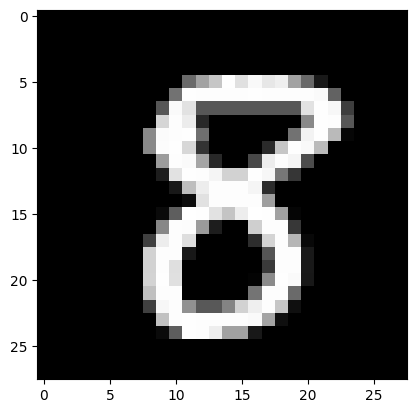

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
#this is the shape of the np.array x_train
#it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
##For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

##Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

##Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [ ]:
#convert class labels to one-hot vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  #now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
#We will build a model with two fully connected layers (using "Dense")
#We will use dropout of .5 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

/Users/timkransberger/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#print the summary of the built model. Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Let's compile the model
from keras.optimizers import RMSprop

learning_rate = 0.001
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=learning_rate),  # <-- this is the fix
    metrics=['accuracy']
)

#note that `categorical cross entropy` is the natural generalization 
#of the loss function we had in binary classification case to multiclass case

In [ ]:
#Now let's fit (train model_1).

batch_size = 128  #mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5656 - loss: 1.2916 - val_accuracy: 0.9175 - val_loss: 0.2887
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8510 - loss: 0.4967 - val_accuracy: 0.9359 - val_loss: 0.2236
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.4099 - val_accuracy: 0.9444 - val_loss: 0.1955
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8950 - loss: 0.3693 - val_accuracy: 0.9504 - val_loss: 0.1750
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9029 - loss: 0.3504 - val_accuracy: 0.9513 - val_loss: 0.1688
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.3298 - val_accuracy: 0.9552 - val_loss: 0.1616
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.3143 - val_accuracy: 0.9565 - val_loss: 0.1573
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.3029 - val_accuracy: 0.

In [ ]:
##We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
model_1_loss= score[0]
model_1_acc= score[1]
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15818536281585693
Test accuracy: 0.965499997138977


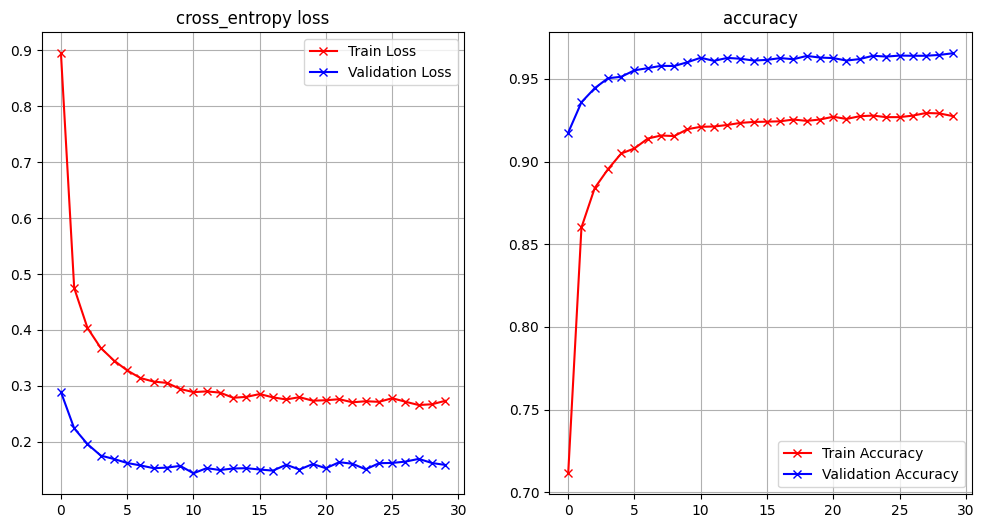

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

### Keras Layers for CNNs
- Previously we built a neural network using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained below for your convenience (please do check the manual of Keras to understand the meaning of all the paramters)
- `filters`: the number of filters,  in other words, the depth of the output.
- `kernel_size`: an (H,W) tuple giving the height and width of the kernel (filter) to be used. It can also be an integer x which is equivalent to a tuple (x,x) 
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`. It can also be an integer x which is equivalent to a tuple (x,x) 
- `input_shape`: required only for the first layer

Note that the size of the output will be determined by the kernel_size and strides.

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


### (1) Build your own CNN model 
Use the Keras "Sequential" functionality to build a convolutional neural network named `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build model_2 according to the famous LeNet-5 architecutre below and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Relu -> Output(SoftMax)
<br>

1. Convolution1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling2 kernel size: 2(H) x 2(W), stride = 2
5. Fully Connected1 size: 120
6. Fully Connected2 size: 84
7. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
8. Plot the loss and accuracy graph for training the new model 
9. Evaluate the model on test data

Please train the built model on the training data (x_train, y_train), and print the test loss and test accuracy of the trained model on the test data (x_test, y_test). Please call the given plot_loss_accuracy function on the history returned by model_2.fit to have the curves of loss and accuracy on the training data and the validation data during the training process of model_2. Note that the validation data is the same as the test data.

Hints:
<ul>
  <li> You will need to have a Flatten layer to make the dimension of the Output be 10 (the number of classes). Check how to connect the output of convolution layer with the first fully connected layer.
<li> You will not be graded on the accuracy of your model, but it should have a decent accuracy of at least 70%. Performance below 70% means there is something wrong with the implementation.
<li> Do not use any padding or dropout in model_2. Such choices can be used for Project Bonus and Fashion MNIST.
    </li></ul>

To use the LeNet model, we need to do some preprocessing on the data first.

In [16]:
# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
# model_2 requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [18]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

### Write your code below for task (1)

Epoch 1/20


/Users/timkransberger/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1574 - loss: 2.2215 - val_accuracy: 0.7160 - val_loss: 0.8799
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7924 - loss: 0.6461 - val_accuracy: 0.8889 - val_loss: 0.3405
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9044 - loss: 0.3106 - val_accuracy: 0.9413 - val_loss: 0.1877
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9405 - loss: 0.1906 - val_accuracy: 0.9443 - val_loss: 0.1635
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9597 - loss: 0.1316 - val_accuracy: 0.9649 - val_loss: 0.1019
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9682 - loss: 0.1014 - val_accuracy: 0.9694 - val_loss: 0.0936
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9743 - loss: 0.0827 - val_accuracy: 0.9722 - val_loss: 0.0811
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9778 - loss: 0.0736 - val_accuracy: 0.977

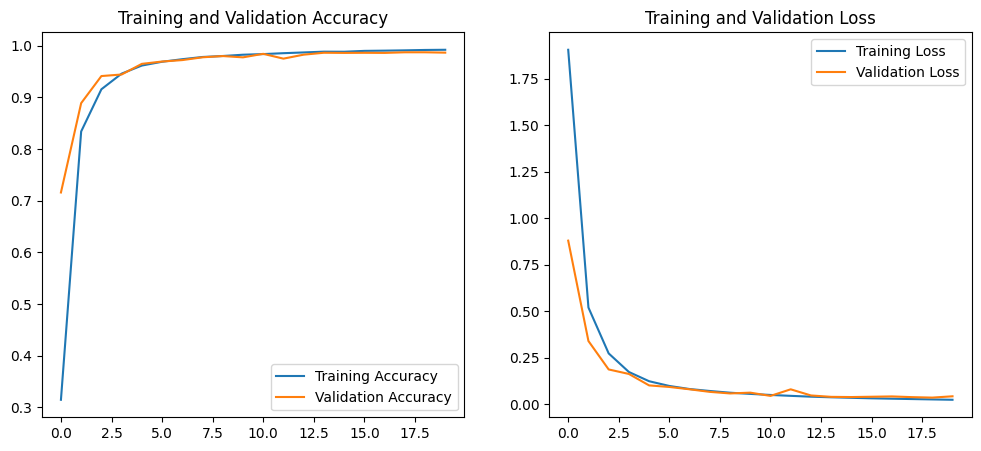

313/313 - 1s - 2ms/step - accuracy: 0.9866 - loss: 0.0434
Test Loss: 0.0434
Test Accuracy: 0.9866


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#Preprocess labels 
if len(y_train.shape) > 1 and y_train.shape[1] == 10:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Model Definition 
model_2 = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(16, kernel_size=(5, 5), strides=1, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile Model
model_2.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_2.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

#show results
def plot_loss_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()


plot_loss_accuracy(history)

#show numbers for results
test_loss, test_accuracy = model_2.evaluate(x_test, y_test, verbose=2)
model_2_acc = test_accuracy
model_2_loss= test_loss
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


### (2)Comparing the curves of the loss and accuracy

Compare the curves of the loss and accuracy on the training data and the validation (test) data for model_1 and model_2. Please write down your observations. For example, (1) which model has higher validation (test) loss?  (2) which model has higher validation (test) accuracy? (3) Do (1)-(2) for the training loss and the training accuracy; (4) Which measure do you think is more meaningful, the loss or the accuracy?

In [20]:

print("1 Which model has higher validation loss?")
print(f"Model 1 Test Loss: {model_1_loss}")
print(f"Model 2 Test Loss: {model_2_loss}")
print("Model 1 has a higher test loss.\n")
print("2 Which model has higher validation accuracy?")
print(f"Model 1 Test Accuracy: {model_1_acc * 100:.2f}%")
print(f"Model 2 Test Accuracy: {model_2_acc * 100:.2f}%")
print("Model 2 has higher test accuracy.\n")

print("3 Training Loss and Training Accuracy Comparison:")
print("Model 2 shows lower training loss and higher training accuracy than Model 1.")
print("Suggesting better learning and generalization from Model 2.\n")

print("4 Which measure is more meaningful — loss or accuracy?")
print("Accuracy is more meaningful for evaluating classification performance.")
print("Loss is more useful for diagnosing training behavior such as confidence or overfitting.")
print("In this context, accuracy gives a better performance comparison.\n")


1 Which model has higher validation loss?
Model 1 Test Loss: 0.15818536281585693
Model 2 Test Loss: 0.04341323301196098
Model 1 has a higher test loss.

2 Which model has higher validation accuracy?
Model 1 Test Accuracy: 96.55%
Model 2 Test Accuracy: 98.66%
Model 2 has higher test accuracy.

3 Training Loss and Training Accuracy Comparison:
Model 2 shows lower training loss and higher training accuracy than Model 1.
Suggesting better learning and generalization from Model 2.

4 Which measure is more meaningful — loss or accuracy?
Accuracy is more meaningful for evaluating classification performance.
Loss is more useful for diagnosing training behavior such as confidence or overfitting.
In this context, accuracy gives a better performance comparison.



### We will perform similar tasks for Fashion MNIST dataset. 

Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
#Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [22]:
x_train[0].shape

(28, 28)

In [23]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#What is the corresponding label in the training set?
y_train[333]

np.uint8(8)

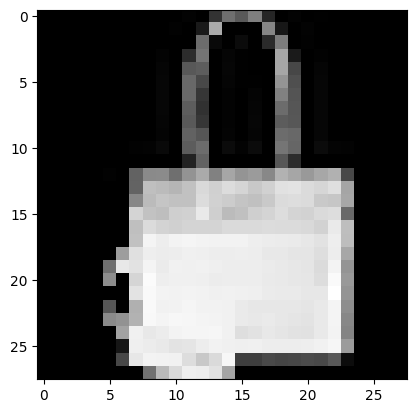

In [ ]:
#Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
#this is the shape of the np.array x_train
#it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
##For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

##Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

##Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [ ]:
#convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Reperforming the earlier preprocessing methods

In [ ]:
#Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
#LeNet requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [31]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

### (3) Training on Fashion MNIST

Build a convolutional neural network of your choice. You can freely choose a differnet network structure, learning rate or number of epochs, which (you believe) will lead to a good model for this data set. Report the accuracy of your model on the test data (x_test,y_test).

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7742 - loss: 0.6301 - val_accuracy: 0.8682 - val_loss: 0.3686
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8911 - loss: 0.3072 - val_accuracy: 0.8913 - val_loss: 0.3044
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9081 - loss: 0.2523 - val_accuracy: 0.8954 - val_loss: 0.2811
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9193 - loss: 0.2167 - val_accuracy: 0.9054 - val_loss: 0.2559
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9318 - loss: 0.1897 - val_accuracy: 0.9094 - val_loss: 0.2545
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9385 - loss: 0.1682 - val_accuracy: 0.9170 - val_loss: 0.2328
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9469 - loss: 0.1453 - val_accuracy: 0.9173 - val_loss: 0.2356
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9520 - loss: 0.1303 - 

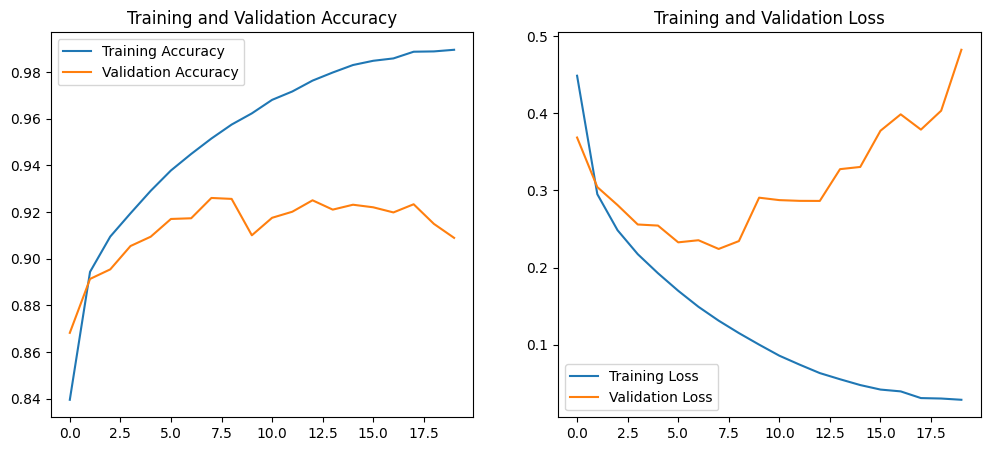

In [32]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

#train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test)
)


test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

def plot_loss_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    
    #accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    #loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_loss_accuracy(history)